In [1]:
import math

# Power function
print("2^5 = " + str(math.pow(2,5)))

2^5 = 32.0


In [2]:
# Ceiling function
print(math.ceil(3.45))

print(math.ceil(10.01))

4
11


In [3]:
# Floor function
print(math.floor(5.25))

print(math.floor(11.01))

5
11


In [4]:
# Absolute Value
print(math.fabs(-10.33))

print(math.fabs(5.25))

10.33
5.25


In [5]:
# Log with base e, or natural log
print(math.log(1000))

6.907755278982137


In [6]:
# Log with a specified base of 10
print(math.log(1000,10))

2.9999999999999996


In [7]:
# Let's see what happen if we use a list to represent a vector?
[1,2,3] * 3

[1, 2, 3, 1, 2, 3, 1, 2, 3]

In [8]:
# Previous was NOT the expected output with vector multiplication by a scalar

# Need to do this
[i*3 for i in [1,2,3]]

[3, 6, 9]

In [9]:
# What about summing two vectors?

# Treated as list concatenation
[1,2,3]+[4,5,6]

[1, 2, 3, 4, 5, 6]

In [10]:
# Sum two vectors
a = [1,2,3]
b = [4,5,6]
[a[i] + b[i] for i in range(len(a))]

[5, 7, 9]

In [11]:
# cross product or dot product?
[1,2,3] * [4,5,6] 

TypeError: can't multiply sequence by non-int of type 'list'

In [12]:
# We could compute the dot product like this:

u = [1,2,3]
v = [4,5,6]

total = 0 
for i in range(len(u)):
    total += u[i] * v[i]
total

32

In [13]:
# Let's see what happens if we use Numpy

# np is a common convention to refer to numpy throughout the code
import numpy as np 
u = np.array([1,2,3])
v = np.array([4,5,6])

# dot() calculates the dot product of two vectors
np.dot(u,v)

32

In [14]:
type(u)

numpy.ndarray

In [15]:
print(u)

[1 2 3]


In [16]:
# Some more operations on 1D-arrays:

import numpy as np
u = np.array([1,2,3])
v = np.array([4,5,6])

print("Vector addition with another vector ---> " + str(u+v))
print("Vector addition with a scalar ---> " + str(u+4))
print("Vector multiplication by a scalar ---> " + str(u * 4))
print("Vector multiplication (NOT dot nor cross product) ---> " + str(u * v))
print("Vector sum ---> " + str(np.sum(u * v)))
print("Dot product ---> " + str(np.dot(u,v)))

Vector addition with another vector ---> [5 7 9]
Vector addition with a scalar ---> [5 6 7]
Vector multiplication by a scalar ---> [ 4  8 12]
Vector multiplication (NOT dot nor cross product) ---> [ 4 10 18]
Vector sum ---> 32
Dot product ---> 32


In [17]:
"""
Let's look at multi-dimensional arrays: 'arrays within arrays'

The following code creates a total of three 3*3 matrices with all ones
"""
u = np.ones((3,3,3))
u

array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]])

In [18]:
# Return the shape/dimension of array
u.shape

(3, 3, 3)

In [19]:
np.ones((2,3))

array([[1., 1., 1.],
       [1., 1., 1.]])

In [20]:
np.ones((3, 2))

array([[1., 1.],
       [1., 1.],
       [1., 1.]])

estimated B for each error 

4.0+-0.2: 1.31+-0.03
3.5+-0.2: 1.14+-0.02
3.0+-0.2: 0.97+-0.04
2.5+-0.2: 0.81+-0.02
2.0+-0.2: 0.76+-0.05

 Estimated parameters of m and b:  [0.286 0.14 ]

 Estimated variance of m & b:  [0.02778489 0.08563877]


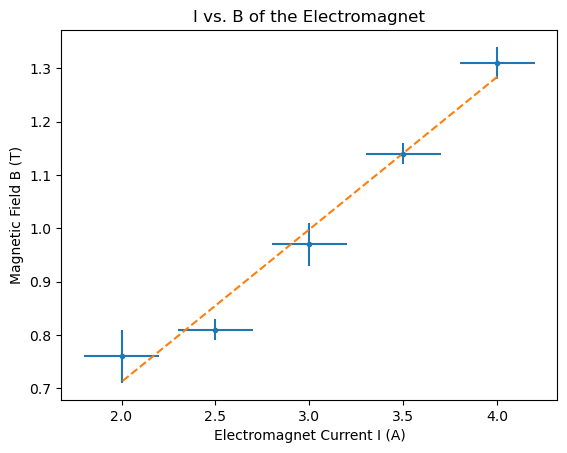

In [21]:
# import different packages used for data analysis
# .. "as opt" means that the programmer could use the shorthand of "opt" to refer to this library, instead of typing the entire name
import scipy.optimize as opt
import numpy as np
import matplotlib.pyplot as plt


# Raw data manually entered by user
I =[4.0, 3.5, 3.0, 2.5, 2.0]
B =[1.31, 1.14, 0.97 ,0.81, 0.76]
IError = [0.2, 0.2, 0.2, 0.2, 0.2]
BError = [0.03, 0.02, 0.04, 0.02, 0.05]

print("estimated B for each error \n")
for i in range (5) :
  print(str(I[i]) + "+-" + str(IError[i]) + ": " + str(B[i]) + "+-" + str(BError[i]))
  
# Apply Numpy library to format the list of raw data into a multi-dimensional matrix
# This is necessary for function optimization and in order to properly use the Scipy package
xdata = np.array(I)
ydata = np.array(B)
xerror = np.array(IError)
yerror= np.array(BError)

# Define linear function for fitting,
def func(h, m, b):
    return m*h + b


# w gives the estimated parameter for m and b, stored in the square matrix of w and u
# the missing _ return info about variance and covariance

# w is a matrix with information about the value of slope and y-intercept
w, u = opt.curve_fit(func, xdata, ydata) 

# Apply x coordinates and optimized result about curve fit to find the "Line of the Best Fit"
yfit = func(xdata,*w)
    
# Use Matplotlib package to graph data
  # 1. Graph the error bars for each x-value 
  # 2. Graph the "Line of the Best Fit"

# Note: there are options to customize the look of your graph with different parameters
plt.errorbar(I, B, xerr=IError, yerr = BError, fmt='o', ms = 3)
plt.plot(xdata,yfit,label="Fit", linewidth=1.5, linestyle='dashed')

# Add title and labels to the graph
plt.title('I vs. B of the Electromagnet')
plt.xlabel('Electromagnet Current I (A)')
plt.ylabel('Magnetic Field B (T)')


print("\n Estimated parameters of m and b: ", w)
print("\n Estimated variance of m & b: ", np.sqrt(np.diag(u)))

# If necessary, this is how you could save the graph to your local machine. 
# But here we do NOT need to save the graph, so we will comment out this line. 

# Specify the image name as the parameter
### plt.savefig('IvsB.jpg')

# Note: if you are showing and storing the graph, make sure you SAVE before SHOW.
plt.show()
    
    

In [ ]:
"""
app.route defines the URL and what function to run for each URL.

When only '/' is specified in the URL, it is assumed to be the home page. 
This web application will serve the text '<h1>WELCOME to My Home Page</h1>'
in header 1 style. 

When the URL contains a name in the URL, the name from the URL is parsed to be used 
in the function that serves the web page. This is known as a "dynamic webpage." 

When admin is specific in the URL, the admin() will run to 
redirects the page to show the home page. 

Refer to the images below for a view of how each page.
""" 


# Import packages
from flask import Flask, redirect, url_for

app = Flask(__name__)

@app.route("/")
def home():
  return "<h1>WELCOME to My Home Page</h1>"

@app.route("/<name>")
def user(name):
  return f"<h3>Hello, nice to meet you {name}!</h3>"

@app.route("/admin")
def admin():
  return redirect(url_for("home"))

if __name__ == "__main__":
  app.run()

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
127.0.0.1 - - [03/Oct/2023 17:00:55] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [03/Oct/2023 17:00:55] "GET /favicon.ico HTTP/1.1" 200 -
127.0.0.1 - - [03/Oct/2023 17:02:46] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [03/Oct/2023 17:02:47] "GET /favicon.ico HTTP/1.1" 200 -
127.0.0.1 - - [03/Oct/2023 17:03:08] "GET /admin HTTP/1.1" 302 -
127.0.0.1 - - [03/Oct/2023 17:03:08] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [03/Oct/2023 17:03:08] "GET /favicon.ico HTTP/1.1" 200 -
127.0.0.1 - - [03/Oct/2023 17:03:17] "GET /will HTTP/1.1" 200 -
127.0.0.1 - - [03/Oct/2023 17:03:17] "GET /favicon.ico HTTP/1.1" 200 -
127.0.0.1 - - [03/Oct/2023 17:03:30] "GET /admin HTTP/1.1" 302 -
127.0.0.1 - - [03/Oct/2023 17:03:30] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [03/Oct/2023 17:03:30] "GET /favicon.ico HTTP/1.1" 200 -
